In [172]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import configs
import os

# Collect

In [176]:
pfiles = []
pickle_dir = 'pickles/foraging_simpler_dim10/'
for pfile in os.listdir(pickle_dir):
    pfiles.append(f'{pickle_dir}{pfile}')

In [177]:
_results = {}
for pfile in pfiles:
    with open(pfile, 'rb') as f:
        results = pickle.load(f)
    idxs = np.argwhere([
        v[-1] > 0.9 for v in results['valid_scores']]).squeeze()
    idxs = idxs.reshape((-1,))
    for key in results.keys():
        if key not in _results.keys():
            _results[key] = []
        for idx in idxs:
            _results[key].append(results[key][idx])
results = _results

In [178]:
fname_order = [
    'transfer_foraging_mf', 'transfer_foraging_mb',
    'transfer_foraging_mb_and_loss']

In [179]:
dim_data = {
    'fnames': [], 'dims': []
}

for fname in np.unique(results['fname']):
    idxs = np.argwhere(np.array(results['fname']) == fname).squeeze()
    _dims = [results['dimensionality_tracking'][i] for i in idxs]
    dim_data['fnames'].extend(_dims)
    dim_data['dims'].extend([fname]*len(_dims))
    
dim_data = pd.DataFrame(dim_data)

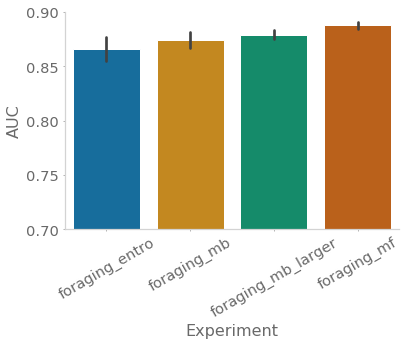

In [180]:
plt.figure()
sns.barplot(
    y='fnames', x='dims', data=dim_data,
    #order=['foraging_mf', 'foraging_mb']
    )
plt.ylim(0.7, 0.9)
plt.ylabel('AUC')
plt.xlabel('Experiment')
plt.xticks(rotation=30)
plt.show()

# Transfer

In [181]:
data = {
    'scores': [],
    'epochs': [],
    'fname': []
    }
for valid_score, fname in zip(results['valid_scores'], results['fname']):
    for epoch, score in enumerate(valid_score):
        data['scores'].append(score)
        data['epochs'].append(epoch)
        data['fname'].append(fname)

In [182]:
df = pd.DataFrame(data)

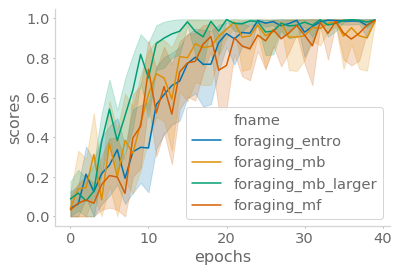

In [183]:
sns.lineplot(
    x='epochs', y='scores', hue='fname',
    data=df[df['epochs']<=39],
    #hue_order=fname_order[:-1]
    )